<a href="https://colab.research.google.com/github/rajy4683/S11EVA4/blob/master/S11EVA4_CLR3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Fri Apr 10 16:19:18 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import sys

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Downloading and installing dependencies from the GitHub link:


In [0]:
#!git clone https://github.com/rajy4683/RekogNizer.git /content/drive/My\ Drive/EVA4/RekogNizer

In [4]:
!pip install -r /content/drive/My\ Drive/EVA4/RekogNizer/requirements.txt

     |████████████████████████████████| 112kB 8.0MB/s 
     |████████████████████████████████| 1.4MB 8.1MB/s 
     |████████████████████████████████| 102kB 14.6MB/s 
     |████████████████████████████████| 102kB 13.8MB/s 
     |████████████████████████████████| 112kB 49.3MB/s 
     |████████████████████████████████| 460kB 31.9MB/s 
     |████████████████████████████████| 634kB 51.2MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 
     |████████████████████████████████| 71kB 12.1MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6489 sha256=b0a42440ab7d1b313e441edd9bdd6708ff1ad33a1ab59a7bdafebb05de9624a6
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for gql: filename=gql-0.2.0-cp36-none-any.whl size=7630 sha256=ac7f0dd2085f4fb9e31c815de48a0716901af041fe83dcb642ae2899c7d3d429
  Stored in directory: /root/.cache/pip/wheels/ce/0e/7b/58a8a5268655b3ad74feef5aa97946f

In [5]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-76th314g
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-76th314g
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65099 sha256=6da397535b4166fa5c0e50ed1125414c72ad281c77db666885be57aac196294f
  Stored in directory: /tmp/pip-ephem-wheel-cache-kmn2rexf/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


#### WANDB client login

In [6]:
!wandb login a6f947d2d2f69e7a8c8ca0f69811fd554f27d204

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [0]:
sys.path.append('/content/drive/My Drive/EVA4/')
sys.path.append('/content/drive/My Drive/EVA4/RekogNizer')

### Cutout + Horizontal Flip + MotionBlur

In [0]:
%load_ext autoreload

In [10]:
%autoreload 2
from RekogNizer import lrfinder
from RekogNizer import traintest
from RekogNizer import logger
from RekogNizer import fileutils
from RekogNizer import basemodelclass
from RekogNizer import dataloader

from torchsummary import summary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from albumentations import Compose, RandomCrop, Normalize, HorizontalFlip, Resize, Cutout, MotionBlur
from albumentations import (
    HorizontalFlip, Compose, RandomCrop, Cutout,Normalize, HorizontalFlip, RandomBrightnessContrast,
    Resize,RandomSizedCrop, MotionBlur,MultiplicativeNoise,InvertImg,PadIfNeeded,Flip, IAAFliplr,
)
from albumentations.pytorch import ToTensor


from RekogNizer import hyperparams
# hyper_param_values = {
#                       "lr":0.21694816106338752,
#                       "dropout":0.1, 
#                       "momentum":0.7062620648684866, 
#                       "epochs":100, 
#                       "weight_decay":0.00015753761358641488
#                       }
#hyperparams.set_hyperparam(hyper_param_values)
torch.manual_seed(hyperparams.hyperparameter_defaults['seed'])    


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


torch.Size([512, 3, 32, 32]) tensor([-0.0361, -0.0359, -0.0299]) tensor([0.9864, 0.9848, 0.9672])


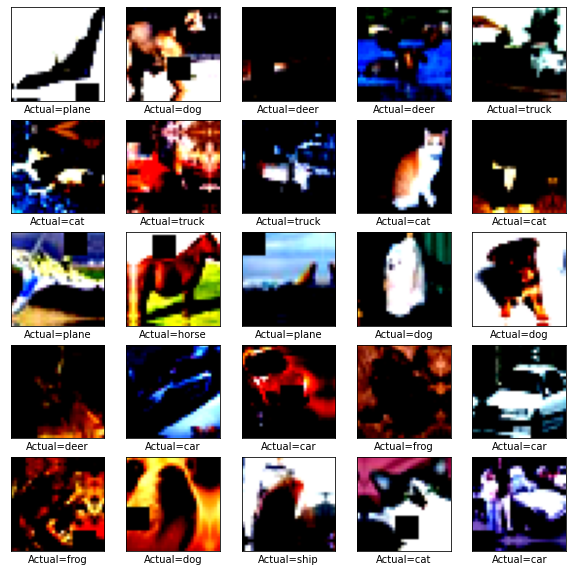

In [12]:
transform_train = Compose([
    #Cutout(num_holes=1,max_h_size=16,max_w_size=16,always_apply=True,p=1,fill_value=[0.5268*255, 0.5267*255, 0.5328*255]),
    PadIfNeeded(min_height=40,min_width=40, always_apply=True, p=1.0),
    RandomCrop(height=32,width=32, p=1),
    #Flip(p=0.5),
    IAAFliplr(p=1),
    Cutout(num_holes=1,max_h_size=8,max_w_size=8,always_apply=True,p=1,fill_value=[0.4914*255, 0.4826*255, 0.44653*255]),
    #Cutout(num_holes=1,max_h_size=16,max_w_size=16,always_apply=True,p=1,fill_value=[0.4819*255, 0.4713*255, 0.4409*255]),
    #MotionBlur(blur_limit=7, always_apply=True, p=1),
    #RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, always_apply=True, p=1),
    #MultiplicativeNoise(multiplier=1.5, p=1),
    #InvertImg(p=0.5),
    #HorizontalFlip(p=1),
    Normalize(
      mean=[0.4914, 0.4826, 0.44653],
      std=[0.24703, 0.24349, 0.26519],
      ),
    # Normalize(
    #    mean=[0.5268, 0.5267, 0.5328],
    #    std=[0.3485, 0.3444, 0.3447],
    #    ),
    
    ToTensor()
    ])
trainloader, testloader = dataloader.get_train_test_dataloader_cifar10(transform_train=transform_train)

torch.manual_seed(1)
dataiter = iter(trainloader)
images, labels = dataiter.next()

fileutils.show_sample_images(images,labels, dataloader.classes)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
 ModifiedResBlock-14          [-1, 128,

Epoch:1.0 val_acc:49.19 loss:1.416452459526062 lr:0.0010715193052376064 
Epoch:2.0 val_acc:55.26 loss:1.2579986513137817 lr:0.0011481536214968829 
Epoch:3.0 val_acc:58.72 loss:1.1627178329467773 lr:0.0012302687708123817 
Epoch:4.0 val_acc:63.3 loss:1.0304300064086913 lr:0.001318256738556407 
Epoch:5.0 val_acc:62.81 loss:1.029058743095398 lr:0.0014125375446227544 
Epoch:6.0 val_acc:67.96 loss:0.9166310461044311 lr:0.0015135612484362083 
Epoch:7.0 val_acc:69.55 loss:0.8658092769622803 lr:0.00162181009735893 
Epoch:8.0 val_acc:68.18 loss:0.8921050634384156 lr:0.0017378008287493756 
Epoch:9.0 val_acc:71.09 loss:0.8427731142044067 lr:0.0018620871366628676 
Epoch:10.0 val_acc:73.1 loss:0.76697300157547 lr:0.00199526231496888 
Epoch:11.0 val_acc:73.64 loss:0.7548546760559082 lr:0.002137962089502232 
Epoch:12.0 val_acc:74.59 loss:0.7356793847084045 lr:0.0022908676527677732 
Epoch:13.0 val_acc:74.91 loss:0.7267845924377442 lr:0.0024547089156850307 
Epoch:14.0 val_acc:77.74 loss:0.63141683092117

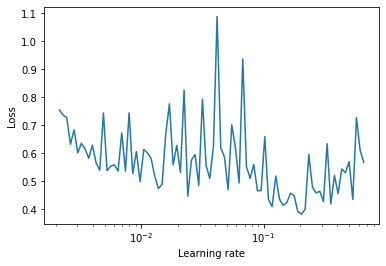

In [0]:
%autoreload 1
from RekogNizer import dataloader
from RekogNizer import traintest
from RekogNizer import basemodelclass
#model_new = basemodelclass.ResNet18(hyperparams.hyperparameter_defaults['dropout'])
model_new = basemodelclass.S11ResNet()
summary(model_new.to(torch.device("cuda")),input_size=(3, 32, 32))


torch.manual_seed(1)
criterion = nn.CrossEntropyLoss()
##3.279445101495624
#0.30585674609910773
#optimizer = optim.SGD(model_new.parameters(), lr=0.279445101495624, weight_decay=0.00020996378493752516,momentum=0.42786879879874073)#-->89.43


optimizer = optim.SGD(model_new.parameters(), lr=0.0000279445101495624, weight_decay=0.0,momentum=0.9)

#traintest.find_lr_type1(model_new, optimizer, criterion, trainloader, seed=1)
lr_finder = traintest.find_lr_type1(model_new, optimizer, criterion, 
                                    trainloader, testloader=testloader, 
                                    seed=1,num_iter=10000,
                                    start_lr=0.001,end_lr=1, step_mode='linear')

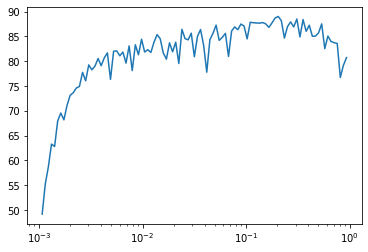

In [0]:
lrs = lr_finder.history['lr']
acc = lr_finder.history['val_acc']
#plt.plot(acc, np.arange(len(acc)))

plt.plot(lrs,acc)#,lrs)
plt.xscale("log")
#plt.xlabel("Learning rate")
#plt.ylabel("acc")

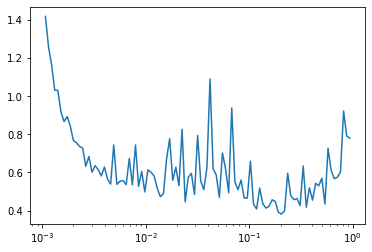

In [0]:
lrs = lr_finder.history['lr']
acc = lr_finder.history['loss']
#plt.plot(acc, np.arange(len(acc)))

plt.plot(lrs,acc)#,lrs)
plt.xscale("log")
#plt.xlabel("Learning rate")
#plt.ylabel("acc")

In [0]:
lr_finder.history.pop('acc')
df_lrf = pd.DataFrame(lr_finder.history)

In [0]:
df_lrf.describe()

,lr,loss,val_acc
count,99.000000,99.000000,99.000000
mean,0.141083,0.623621,81.517475
std,0.220833,0.191675,7.252772
min,0.001072,0.381254,49.190000
25%,0.005825,0.495097,79.570000
50%,0.031623,0.574671,83.730000
75%,0.171893,0.692349,86.210000
max,0.933254,1.416452,89.010000


In [19]:
############ Results with IAAFliplr(p=0.5)
!python  /content/drive/My\ Drive/EVA4/RekogNizer/train_s11_new.py -p '{"lr":0.015084, "ocp_max_lr":0.19054607179632474, "anneal_strategy":"linear","div_factor":128,"final_div_factor":64, "momentum":0.9, "epochs":24, "weight_decay":0.0000002,"batch_size":512}'

  pip install torch-lr-finder -v --global-option="amp"
Setting  lr  =  0.015084
Setting  ocp_max_lr  =  0.19054607179632474
Setting  anneal_strategy  =  linear
Setting  div_factor  =  128
Setting  final_div_factor  =  64
Setting  momentum  =  0.9
Setting  epochs  =  24
Setting  weight_decay  =  2e-07
Setting  batch_size  =  512
Final Hyperparameters
             dropout : 0.1 
          batch_size : 512 
     test_batch_size : 128 
                  lr : 0.015084 
            momentum : 0.9 
             no_cuda : False 
                seed : 1 
              epochs : 24 
                bias : False 
      sched_lr_gamma : 0.5 
       sched_lr_step : 1 
            start_lr : 0 
        weight_decay : 2e-07 
  lr_decay_threshold : 0.0 
              factor : 0.0 
             project : news5 
          ocp_max_lr : 0.19054607179632474 
    final_div_factor : 64 
          div_factor : 128 
     anneal_strategy : linear 
           pct_start : 0.208 
Files already downloaded and verif

#### The APIs for inferencing and plotting are moved out of the training script.


In [0]:
from RekogNizer import traintest
from RekogNizer import logger
from RekogNizer import fileutils
from RekogNizer import basemodelclass
from RekogNizer import dataloader

import pandas as pd
import numpy as np
import torch

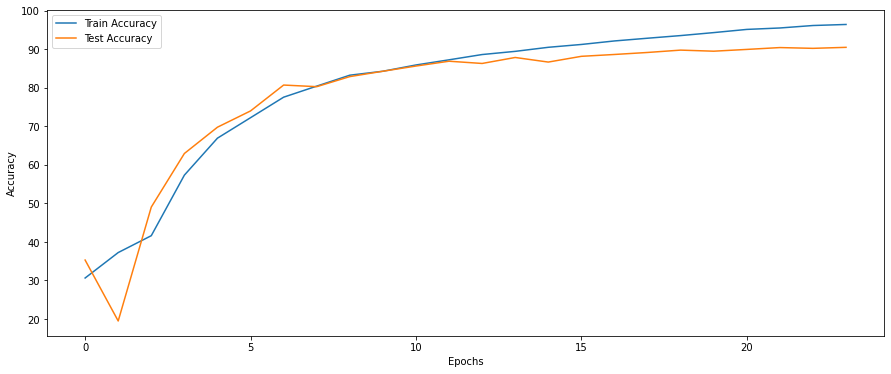

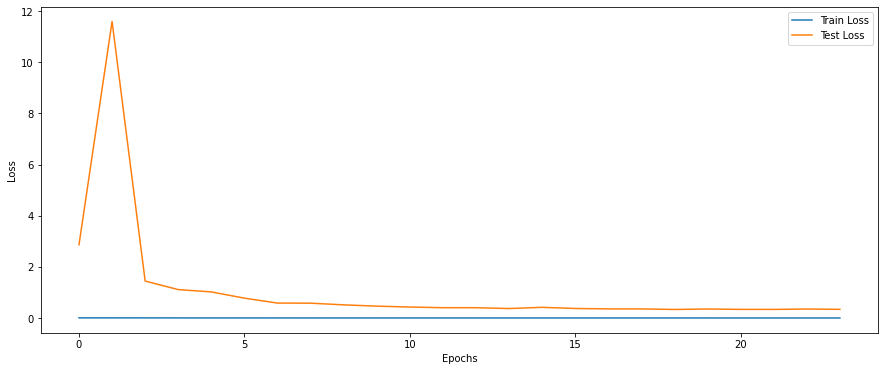

In [21]:
run_list = ['rajy4683/news5/runs/2k8rvopk']
runs_df = logger.get_wandb_dataframes(run_list=run_list)#(project="rajy4683/news5",count=1)
new_df = pd.DataFrame().append(runs_df)


fileutils.plot_graphs([new_df],
            ['Train Accuracy', 'Test Accuracy'],
            columns=['Train Accuracy', 'Test Accuracy'],
            xlabel="Epochs",
            ylabel="Accuracy")

fileutils.plot_graphs([new_df],
            ['Train Loss', 'Test Loss'],
            columns=['Train Loss', 'Test Loss'],
            xlabel="Epochs",
            ylabel="Loss")

In [22]:
%load_ext autoreload
%autoreload 2
from RekogNizer import traintest
import torchvision.transforms as transforms
import torchvision

#my_model,acc = traintest.model_builder2(basemodelclass.ResNet18(), weights_path="/content/drive/My Drive/EVA4/model_saves/model-23b3505819.h5")
#my_model,acc = traintest.model_builder2(basemodelclass.ResNet18(), weights_path="/content/drive/My Drive/EVA4/model_saves/model-15ad50e1bc.h5", local_device=torch.device("cpu"))
#my_model,acc = traintest.model_builder2(basemodelclass.ResNet18(), weights_path="/content/drive/My Drive/EVA4/model_saves/model-2fba2384bd.h5", local_device=torch.device("cpu"))
my_model,acc = traintest.model_builder2(basemodelclass.S11ResNet(), weights_path="/content/drive/My Drive/EVA4/model_saves/model-328da5fdc6.h5", local_device=torch.device("cpu"))

#class_accuracy_dict = traintest.classwise_accuracy(my_model, testloader, classes, device=torch.device("cpu"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
from RekogNizer import hyperparams
# transform_test = transforms.Compose(
#     [transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                     download=True, transform=transform_test)
# testloader = dataloader.get_dataloader(testset, hyperparams.hyperparameter_defaults['batch_size'], shuffle=False, num_workers=2)

trainloader, testloader = dataloader.get_train_test_dataloader_cifar10()

class_accuracy_dict = traintest.classwise_accuracy(my_model, testloader, dataloader.classes, device=torch.device("cuda"))

Files already downloaded and verified
Files already downloaded and verified
Accuracy of plane : 91 %
Accuracy of   car : 96 %
Accuracy of  bird : 86 %
Accuracy of   cat : 79 %
Accuracy of  deer : 90 %
Accuracy of   dog : 84 %
Accuracy of  frog : 93 %
Accuracy of horse : 93 %
Accuracy of  ship : 94 %
Accuracy of truck : 94 %


<BarContainer object of 10 artists>

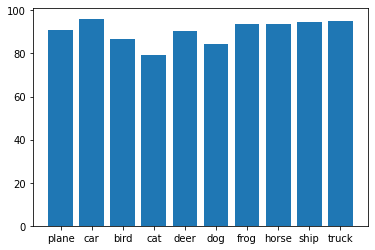

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar([key for key in class_accuracy_dict.keys()],[val for val in class_accuracy_dict.values()])

Files already downloaded and verified
Files already downloaded and verified
944
(944,)
90.56 0.32870927581787107


<Figure size 720x720 with 0 Axes>

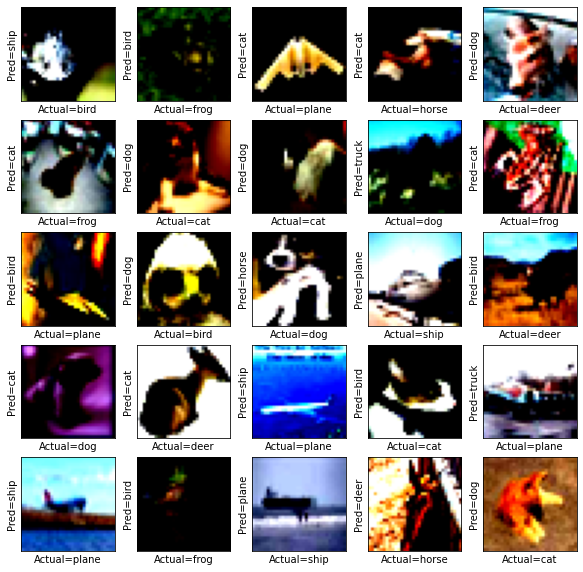

In [25]:
from RekogNizer import traintest
type(my_model)
classes = dataloader.classes
trainloader, testloader = dataloader.get_train_test_dataloader_cifar10()
error_images, preds, actuals = traintest.show_misclassfied_images(my_model, testloader, dataloader.classes)


# GRADCAM Visualizations

In [0]:
import os
import PIL
import numpy as np
import torch
import torch.nn.functional as F
import torchvision.models as models
from torchvision.utils import make_grid, save_image

from RekogNizer.gradcam2 import *

saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])


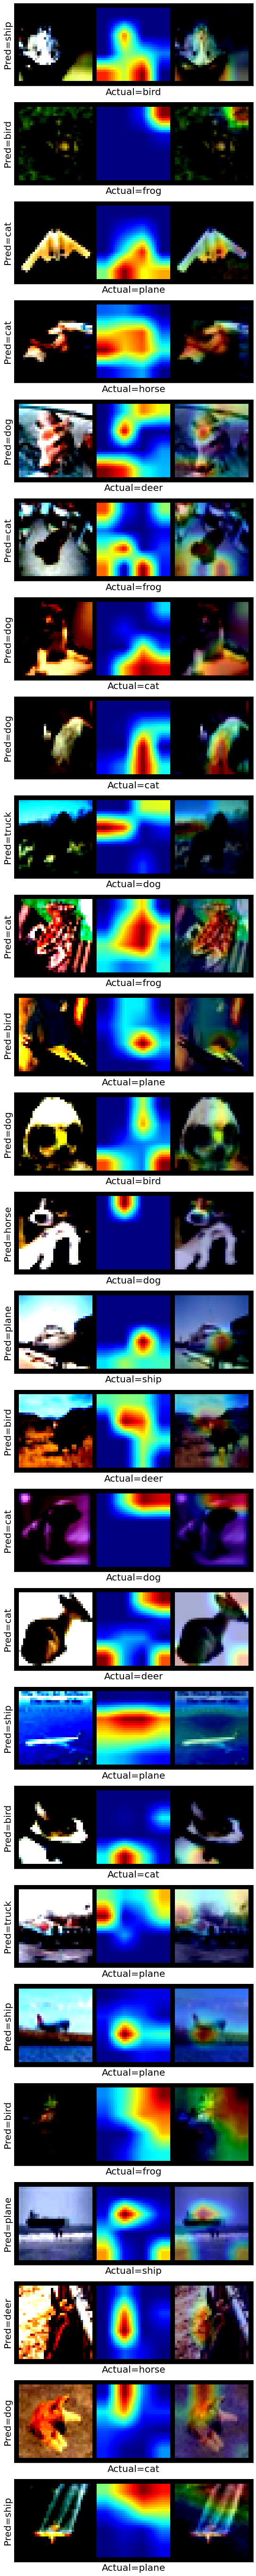

In [27]:
resnet_model_dict = dict(type='resnet', arch=my_model.to(torch.device("cpu")), layer_name='layer3', input_size=(32, 32))
mean=[0.4827, 0.4724, 0.4427]
std=[0.2482, 0.2501, 0.2698]

#classes[np.int(preds[idx])], xlabel="Actual="+classes[np.int(actuals[idx])]
classes = dataloader.classes

#gradcam_images = []
fig = plt.figure(figsize=(100,100))
idx = 0
for elem in zip(error_images[:26], actuals[:26], preds[:26]):
    ax = fig.add_subplot(26, 1, idx+1, xticks=[], yticks=[])
    idx+=1
    npimg= visualize_gradcam_image(resnet_model_dict,
                            elem[0], 
                            classes[np.int(elem[1])], 
                            classes[np.int(elem[2])], 
                            mean=mean, std=std)
    
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    ax.set_xlabel(xlabel="Actual="+classes[np.int(elem[1])],fontsize=20)
    ax.set_ylabel(ylabel="Pred="+classes[np.int(elem[2])],fontsize=20)
                  #xlabel="Actual="+classes[np.int(elem[1])],fontdict=)
fig.savefig('/content/drive/My Drive/EVA4/gradcam_s10eva4.jpg')